Exploring kc_house_data.csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# get_ipython().system('pip install folium')
# import folium

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [69]:
# Replace NaN with 0

df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [70]:
for col in ['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    0.088438
3.0    0.028291
2.5    0.007455
Name: floors, dtype: float64 


waterfront 
 0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64 


view 
 0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64 


condition 
 3    0.649164
4    0.262861
5    0.078761
2    0.007871
1    0.001343
Name: condition, dtype: float64 


grade 
 7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
Name: grade, dtype: float64 


yr_built 
 2014    0.025883
2006    0.020975
2005    0.020

In [9]:
# df.describe()

In [111]:
# Remove extreme points in samples

ext1 = len(df.loc[df['bedrooms'] > 11])
ext2 = len(df.loc[df['sqft_living'] > 10000])
ext3 = len(df.loc[df['sqft_lot'] > 500000])
print(ext1, ext2, ext3)

df.drop(df[df['bedrooms'] > 11].index, inplace = True)
df.drop(df[df['sqft_living'] > 10000].index, inplace = True)
df.drop(df[df['sqft_lot'] > 500000].index, inplace = True)

1 3 21


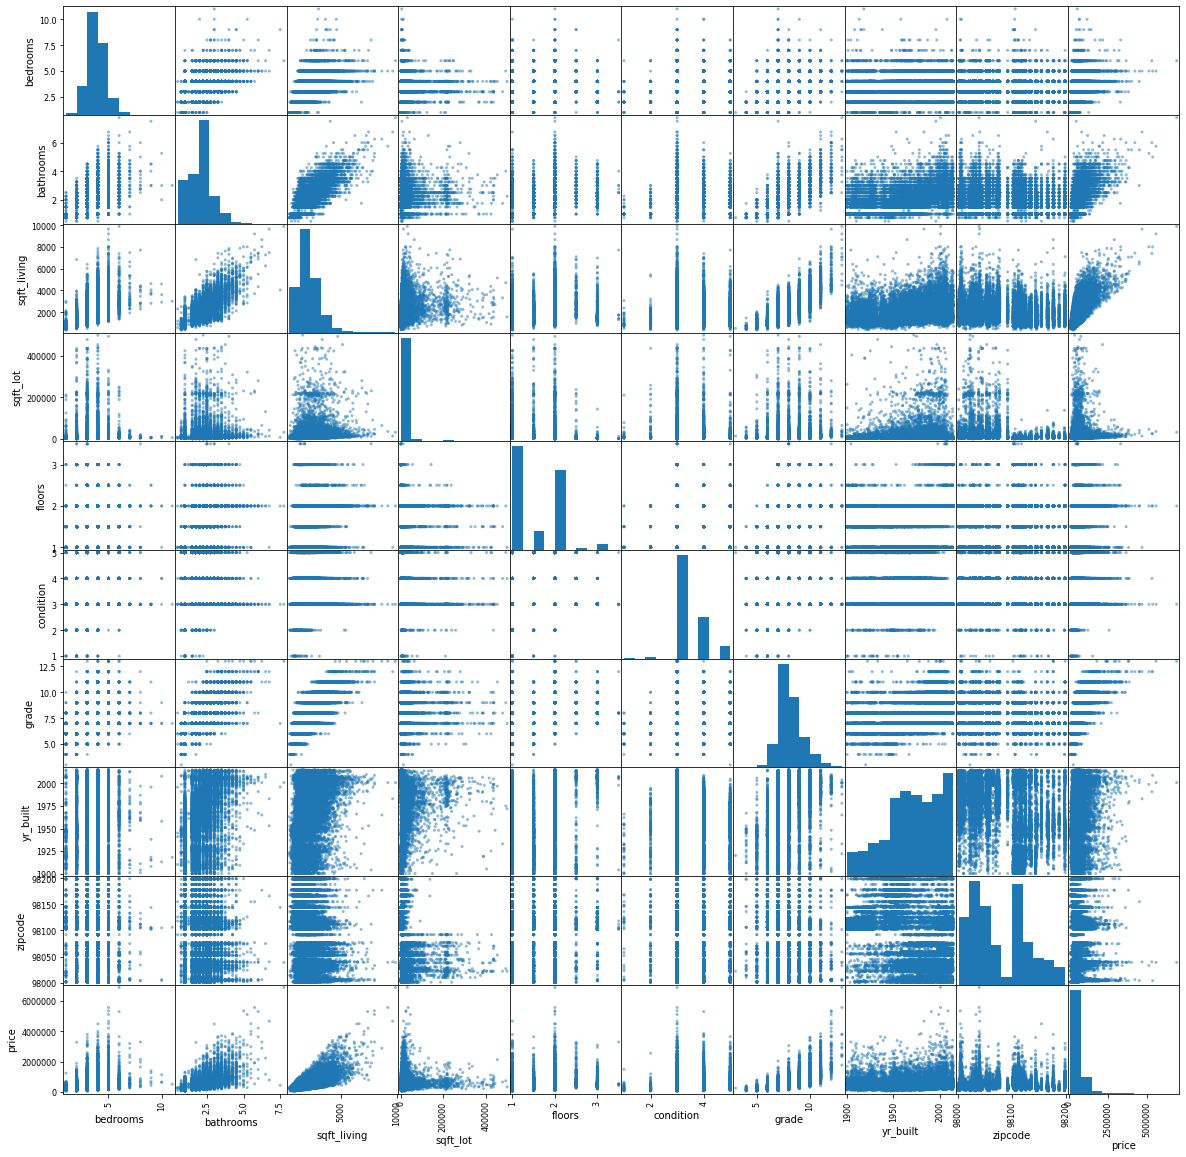

In [140]:
df1 = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
          'condition', 'grade', 'yr_built', 'zipcode', 'price']]

scatter = pd.plotting.scatter_matrix(df1, figsize=(20,20))

In [117]:
# Add new columns to calc price per square ft

df['price_per_sqft_lot'] = df['price']/df['sqft_lot']
df['price_per_sqft_living'] = df['price']/df['sqft_living']
df['sqft_outside'] = (df['sqft_lot'] - df['sqft_living']).astype(int)

In [118]:
# sns.set(rc={'figure.figsize':(20,15)})
# sns.scatterplot('long', 'lat', hue='price_per_sqft_living', data=df)

In [119]:
# df.plot(kind="scatter", x="long", y="lat", label="$/sqft LOT",
#           c="price_per_sqft_lot", cmap=plt.get_cmap("jet"),
#           colorbar=True, alpha=0.4, figsize=(20,15))

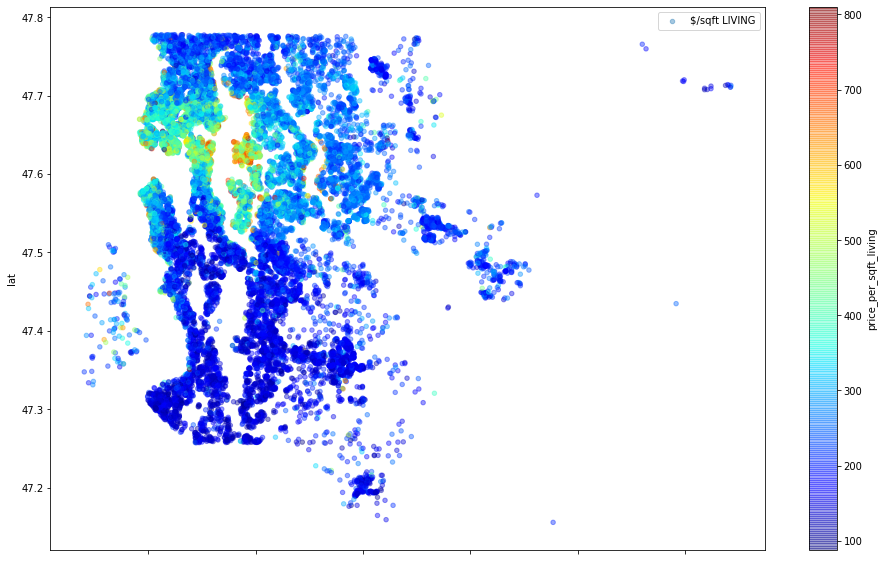

In [171]:
df.plot(kind="scatter", x="long", y="lat", label="$/sqft LIVING",
          c="price_per_sqft_living", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(16,10))

# df.plot(kind="scatter", x="long", y="lat", label="$/sqft LOT",
#           c="price_per_sqft_lot", cmap=plt.get_cmap("jet"),
#           colorbar=True, alpha=0.4, figsize=(20,15))

In [121]:
# df.plot(kind="scatter", x="long", y="lat", label="Zipcode",
#           c="zipcode", cmap=plt.get_cmap("jet"),
#           colorbar=True, alpha=0.4, figsize=(20,15))

In [122]:
# fol_df = df.loc[:, ['lat','long','price_per_sqft_lot','price_per_sqft_living','sqft_lot','sqft_living','zipcode']]
# seattle_map = folium.Map(location=[47.5, -121.8], zoom_start=9)
# for i in range(1000):    
#     marker = folium.CircleMarker(location = [fol_df.lat.loc[i], fol_df.long.loc[i]], radius=1)
#     marker.add_to(seattle_map)
# seattle_map

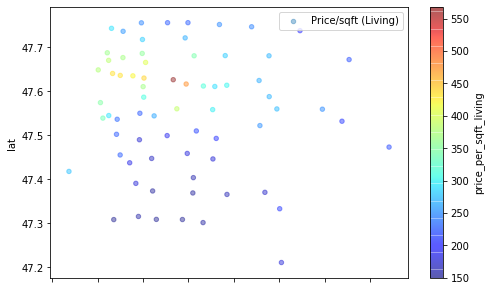

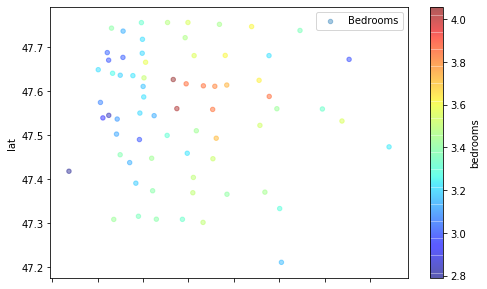

In [142]:
# Identify possible city vs suburb divide by looking at price/sqft and lot area split by zipcode

geo = df.groupby('zipcode').mean()

geo.plot(kind="scatter", x="long", y="lat", label="Price/sqft (Living)",
          c="price_per_sqft_living", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(8,5))

# geo.plot(kind="scatter", x="long", y="lat", label="Sq footage (Plot)",
#           c="sqft_lot", cmap=plt.get_cmap("jet"),
#           colorbar=True, alpha=0.4, figsize=(8,5))

geo.plot(kind="scatter", x="long", y="lat", label="Bedrooms",
          c="bedrooms", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(8,5))

In [143]:
# Assumption of city zipcodes based on price per square ft and num of bedrooms

Seattle = [98199, 98119, 98109, 98102, 98112, 98122, 98144]
West_Seattle = [98116, 98136]
Bellevue = [98039, 98004, 98005, 98006]
Fremont = [98107, 98117, 98103, 98105, 98115]
Mercer_Island = [98040]
Kirkland = [98033]
city_zipcodes_list = Seattle + West_Seattle + Bellevue + Mercer_Island + Kirkland + Fremont

# Older assumptions
# Seattle = [98199, 98119, 98109, 98102, 98112, 98122, 98144]
# West_Seattle = [98116, 98136]
# Bellevue = [98039, 98004, 98005, 98006]
# Fremont = [98107, 98117, 98103, 98105, 98115]
# Mercer_Island = [98040]
# Kirkland = [98033]
# city_zipcodes_list = Seattle + West_Seattle + Bellevue + Mercer_Island + Kirkland + Fremont

city_zipcodes_dict = {}

for i in range(len(city_zipcodes_list)):
     city_zipcodes_dict[city_zipcodes_list[i]] = 2

In [144]:
# city_zipcodes = pd.DataFrame(city_zipcodes_dict, index = list(range(len(city_zipcodes_dict))))

d = {'zipcode': list(city_zipcodes_dict.keys()),'iscity': list(city_zipcodes_dict.values())}
city_zipcodes = pd.DataFrame(data=d)
city_zipcodes = city_zipcodes.set_index('zipcode')

In [145]:
# Add new field to mark city zipcode or suburb zipcode

df2 = df.join(city_zipcodes, how = 'left', on = 'zipcode')

# Replace iscity == NaN with 2 for Suburbs

df2['iscity'] = df2['iscity'].fillna(1)

# Proportion of city properties

print('{}% of properties are categorized as City'
       .format(round(len(df2.loc[df2['iscity']== 1]) / df2.shape[0] * 100,1)))

71.3% of properties are categorized as City


In [146]:
# Check correlation including newly derived columns

df2_check = df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_outside',
                 'floors', 'condition', 'grade', 'iscity', 'price_per_sqft_living', 'price']]
display(df2_check.corr())

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_outside,floors,condition,grade,iscity,price_per_sqft_living,price
bedrooms,1.000000,0.527372,0.594583,0.044354,0.027612,0.182976,0.023547,0.365661,-0.021780,-0.213472,0.316947
bathrooms,0.527372,1.000000,0.754153,0.096306,0.075283,0.502560,-0.126811,0.664784,0.035972,-0.091847,0.524817
sqft_living,0.594583,0.754153,1.000000,0.198708,0.171206,0.353617,-0.059458,0.763872,0.039194,-0.094734,0.699426
sqft_lot,0.044354,0.096306,0.198708,1.000000,0.999608,-0.013554,-0.012212,0.130651,-0.144630,-0.057459,0.094226
sqft_outside,0.027612,0.075283,0.171206,0.999608,1.000000,-0.023722,-0.010579,0.109532,-0.146513,-0.055058,0.074755
floors,0.182976,0.502560,0.353617,-0.013554,-0.023722,1.000000,-0.264009,0.458073,0.102046,0.004218,0.257628
condition,0.023547,-0.126811,-0.059458,-0.012212,-0.010579,-0.264009,1.000000,-0.146681,0.103955,0.103153,0.036902
grade,0.365661,0.664784,0.763872,0.130651,0.109532,0.458073,-0.146681,1.000000,0.129708,0.124470,0.672192
iscity,-0.021780,0.035972,0.039194,-0.144630,-0.146513,0.102046,0.103955,0.129708,1.000000,0.609974,0.411333
price_per_sqft_living,-0.213472,-0.091847,-0.094734,-0.057459,-0.055058,0.004218,0.103153,0.124470,0.609974,1.000000,0.559825


In [147]:
# Define city vs suburb subsets
city_df = df2.loc[df2['iscity']==2]
suburb_df = df2.loc[df2['iscity']==1]

# Quantify city vs suburb price
city_mean_living = city_df.price_per_sqft_living.mean()
city_mean_lot = city_df.price_per_sqft_lot.mean()

suburb_mean_living = suburb_df.price_per_sqft_living.mean()
suburb_mean_lot = suburb_df.price_per_sqft_lot.mean()

print('Price per sqft (living) in City is {}% higher than in the Suburb - based on Mean'
      .format(round((city_mean_living/suburb_mean_living-1)*100),0))

print('Price per sqft (lot) in City is {}% higher than in the Suburb - based on Mean'
      .format(round((city_mean_lot/suburb_mean_lot-1)*100),0))

Price per sqft (living) in City is 67% higher than in the Suburb - based on Mean
Price per sqft (lot) in City is 189% higher than in the Suburb - based on Mean


In [161]:
# The 2 groupings are also distinct when viewed by lot size

# plt.scatter(suburb_df.sqft_lot, suburb_df.price, color = 'red', marker='.')
# plt.scatter(city_df.sqft_lot, city_df.price, marker='.')

(0, 1000)

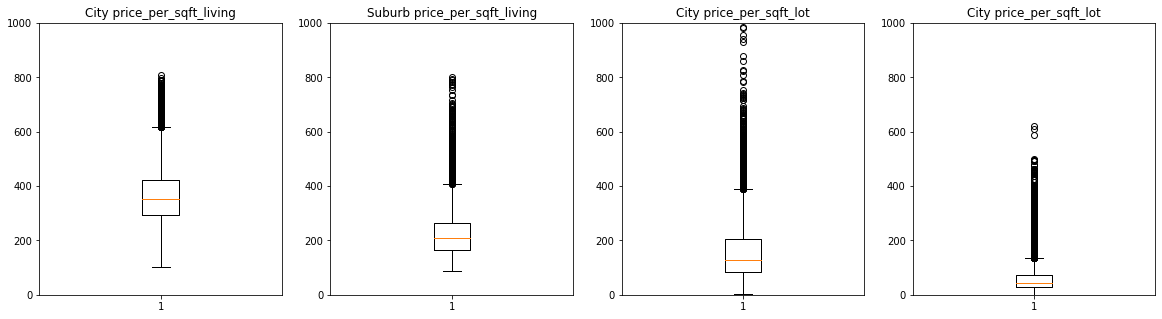

In [149]:
# Investigating the spread of price between city and suburb

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.boxplot(city_df.price_per_sqft_living)
ax1.set_title('City price_per_sqft_living')
ax1.set_ylim(0,1000)

ax2.boxplot(suburb_df.price_per_sqft_living)
ax2.set_title('Suburb price_per_sqft_living')
ax2.set_ylim(0,1000)

ax3.boxplot(city_df.price_per_sqft_lot)
ax3.set_title('City price_per_sqft_lot')
ax3.set_ylim(0,1000)

ax4.boxplot(suburb_df.price_per_sqft_lot)
ax4.set_title('City price_per_sqft_lot')
ax4.set_ylim(0,1000)

In [150]:
# sns.set(rc={'figure.figsize':(20,15)})
# sns.scatterplot('sqft_living', 'price', hue='iscity', data=df2)

In [151]:
# Linear regression model based on sq ft living

# City locations only

cityliving = pd.DataFrame(city_df.sqft_living)
cityprice = pd.DataFrame(city_df.price)

model_skl = LinearRegression(fit_intercept=True)
model_skl.fit(cityliving,cityprice)

r21 = model_skl.score(cityliving,cityprice)
c1 = model_skl.intercept_
m1 = model_skl.coef_
print ('City properties: r2 = {}, intercept = {}, slope = {}'.format(r21.round(3), c1.round(0), m1.round(3)))

# Suburb locations only

suburbliving = pd.DataFrame(suburb_df.sqft_living)
suburbprice = pd.DataFrame(suburb_df.price)

model_skl = LinearRegression(fit_intercept=True)
model_skl.fit(suburbliving,suburbprice)

r22 = model_skl.score(suburbliving,suburbprice)
c2 = model_skl.intercept_
m2 = model_skl.coef_
print ('Suburb properties: r2 = {}, intercept = {}, slope = {}'.format(r22.round(3), c2.round(0), m2.round(3)))

# All locations

living = pd.DataFrame(df2.sqft_living)
price = pd.DataFrame(df2.price)

model_skl = LinearRegression(fit_intercept=True)
model_skl.fit(living,price)

r20 =model_skl.score(living,price)
c0 = model_skl.intercept_
m0 = model_skl.coef_
print ('All properties: r2 = {}, intercept = {}, slope = {}'.format(r20.round(3), c0.round(0), m0.round(3)))

City properties: r2 = 0.662, intercept = [-22129.], slope = [[372.754]]
Suburb properties: r2 = 0.531, intercept = [9171.], slope = [[212.075]]
All properties: r2 = 0.489, intercept = [-37626.], slope = [[277.597]]


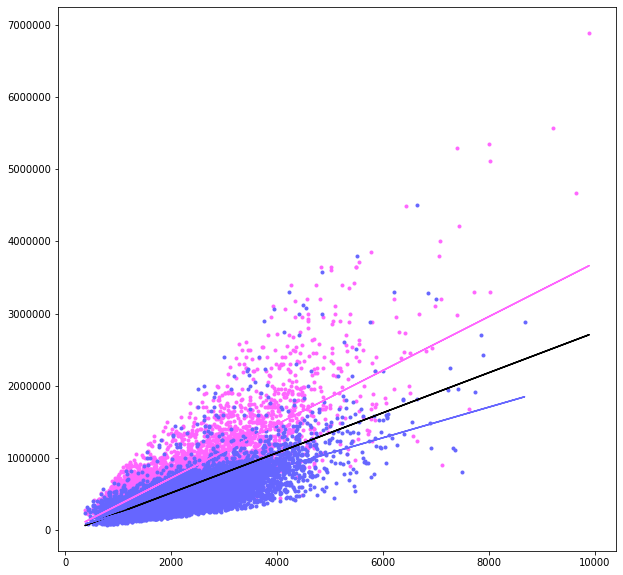

In [178]:
# Define regression lines for x=sq ft living

def reg_line (m, c, xs):
    return [(m*x)+c for x in xs]

reg_line0 = reg_line(float(m0), float(c0), df2.sqft_living.tolist())
reg_line1 = reg_line(float(m1), float(c1), city_df.sqft_living.tolist())
reg_line2 = reg_line(float(m2), float(c2), suburb_df.sqft_living.tolist())

fig = plt.figure(figsize=(10,10))

# Plot regression lines

plt.plot(df2.sqft_living, reg_line0, color = 'black')
plt.plot(city_df.sqft_living, reg_line1, color = '#ff66ff')
plt.plot(suburb_df.sqft_living, reg_line2, color = '#6666ff')

# Plot scatter, split between city and suburb

plt.scatter(city_df.sqft_living, city_df.price, color = '#ff66ff', marker='.')
plt.scatter(suburb_df.sqft_living, suburb_df.price, color = '#6666ff', marker='.')


# ax4.set_title('City price_per_sqft_living')
# ax4.set_ylim(0,5000000)

In [153]:
# Multivariable model (1):

multivariables1 = ['sqft_living','sqft_outside', 'bedrooms', 'bathrooms', 'grade', 'view', 'waterfront']

# multivariables1 = ['sqft_living','bathrooms', 'grade']

# City locations only

test_city = df2.loc[df2['iscity']==2, multivariables1]

model_skl = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)
model_skl.fit(test_city, city_df.price)

r2m1 = model_skl.score(test_city, city_df.price)
cm1 = model_skl.intercept_
mm1 = model_skl.coef_

print('Variables1 = {}'.format(multivariables1))
print('\n')

print('City properties:')
print('R2 = {}'.format(r2m1.round(4)))
print('Intersection: {}'.format(cm1.round(1)))
for i in range(len(multivariables1)):
    print('Coeff{}: {} ({})'.format(i+1, mm1[i].round(1), multivariables1[i]))
print('\n')

# Multivariable model for Suburb:

test_suburb = df2.loc[df2['iscity']==1, multivariables1]

model_skl = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)
model_skl.fit(test_suburb, suburb_df.price)

r2m2 = model_skl.score(test_suburb, suburb_df.price)
cm2 = model_skl.intercept_
mm2 = model_skl.coef_

print('Suburb properties:')
print('R2 = {}'.format(r2m2.round(4)))
print('Intersection: {}'.format(cm2.round(1)))
for i in range(len(multivariables1)):
    print('Coeff{}: {} ({})'.format(i+1, mm2[i].round(1), multivariables1[i]))
print('\n')

# Multivariable model for all properties:

test_all = df2[multivariables1]

model_skl = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)
model_skl.fit(test_all, df2.price)

r2m0 = model_skl.score(test_all, df2.price)
cm0 = model_skl.intercept_
mm0 = model_skl.coef_

print('Combined properties:')
print('R2 = {}'.format(r2m0.round(4)))
print('Intersection: {}'.format(cm0.round(1)))
for i in range(len(multivariables1)):
    print('Coeff{}: {} ({})'.format(i+1, mm0[i].round(1), multivariables1[i]))

Variables1 = ['sqft_living', 'sqft_outside', 'bedrooms', 'bathrooms', 'grade', 'view', 'waterfront']


City properties:
R2 = 0.7244
Intersection: -430366.8
Coeff1: 306.2 (sqft_living)
Coeff2: 1.5 (sqft_outside)
Coeff3: -34613.2 (bedrooms)
Coeff4: -24621.3 (bathrooms)
Coeff5: 87861.1 (grade)
Coeff6: 37255.1 (view)
Coeff7: 964882.9 (waterfront)


Suburb properties:
R2 = 0.6763
Intersection: -306535.6
Coeff1: 141.1 (sqft_living)
Coeff2: 0.3 (sqft_outside)
Coeff3: -24628.4 (bedrooms)
Coeff4: -6796.4 (bathrooms)
Coeff5: 71728.8 (grade)
Coeff6: 45300.3 (view)
Coeff7: 624938.4 (waterfront)


Combined properties:
R2 = 0.5961
Intersection: -461575.4
Coeff1: 199.1 (sqft_living)
Coeff2: -0.6 (sqft_outside)
Coeff3: -31320.1 (bedrooms)
Coeff4: -22717.8 (bathrooms)
Coeff5: 95082.6 (grade)
Coeff6: 69173.2 (view)
Coeff7: 586210.5 (waterfront)


In [185]:
# Test using iscity as a single variable instead of a split:

multivariables = ['sqft_living', 'iscity', 'waterfront', 'grade']
test_all = df2[multivariables]

model_skl = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)
model_skl.fit(test_all, df2.price)

r2m0 = model_skl.score(test_all, df2.price)
cm0 = model_skl.intercept_
mm0 = model_skl.coef_

print('Combined properties:')
print('R2 = {}'.format(r2m0.round(2)))
print('Intersection: {}'.format(cm0.round(1)))
for i in range(len(multivariables)):
    print('Coeff{}: {} ({})'.format(i+1, mm0[i].round(1), multivariables[i]))

Combined properties:
R2 = 0.7
Intersection: -807349.9
Coeff1: 190.7 (sqft_living)
Coeff2: 290122.0 (iscity)
Coeff3: 869030.1 (waterfront)
Coeff4: 74591.6 (grade)


In [169]:
# Setting up the LEARNER

X = test_all
y = df2.price

X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

results.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.053e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:20:21   Log-Likelihood:            -2.9333e+05
No. Observations:               21572   AIC:                         5.867e+05
Df Residuals:                   21566   BIC:                         5.867e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.743e+05   1.07e+04    -72.513      0.000   -7.95e+05   -7.53e+05
sqft_living   181.9600      2.294     79.331      0.000     177.464     186.456
waterfront   6.887e+05   1.76e+04     39.072      0.000    6.54e+05    7.23e+05
iscity       2.821e+05   2983.261     94.562      0.000    2.76e+05    2.88e+05
grade        7.253e+04   1777.012     40.814      0.000     6.9e+04     7.6e+04
view         5.382e+04   1957.936     27.490      0.000       5e+04    5.77e+04
==============================================================================
Omnibus:                    15925.396   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           971637.669
Skew:                           2.979   Prob(JB):                         0.00
Kurtosis:                      35.334   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""